In [1]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

In [2]:
def detect_outliers_dbscan(X, eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan.fit(X)
    labels = dbscan.labels_
    outliers_indices = np.where(labels == -1)[0]
    return outliers_indices

In [3]:
def detect_outliers_boxplot(X):
    Q1 = np.percentile(X, 25)
    Q3 = np.percentile(X, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_indices = np.where((X < lower_bound) | (X > upper_bound))[0]
    return outliers_indices

In [4]:
# Örnek veri kümesi oluşturalım
np.random.seed(0)
X = np.random.normal(loc=0, scale=1, size=100).reshape(-1, 1)
X

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721],
       [-0.10321885],
       [ 0.4105985 ],
       [ 0.14404357],
       [ 1.45427351],
       [ 0.76103773],
       [ 0.12167502],
       [ 0.44386323],
       [ 0.33367433],
       [ 1.49407907],
       [-0.20515826],
       [ 0.3130677 ],
       [-0.85409574],
       [-2.55298982],
       [ 0.6536186 ],
       [ 0.8644362 ],
       [-0.74216502],
       [ 2.26975462],
       [-1.45436567],
       [ 0.04575852],
       [-0.18718385],
       [ 1.53277921],
       [ 1.46935877],
       [ 0.15494743],
       [ 0.37816252],
       [-0.88778575],
       [-1.98079647],
       [-0.34791215],
       [ 0.15634897],
       [ 1.23029068],
       [ 1.20237985],
       [-0.38732682],
       [-0.30230275],
       [-1.04855297],
       [-1.42001794],
       [-1.70627019],
       [ 1.9507754 ],
       [-0.50965218],
       [-0

In [5]:
# Karışık veri seti oluşturma
X = np.concatenate((X, np.random.uniform(low=-10, high=10, size=(20, 1))))
X

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721],
       [-0.10321885],
       [ 0.4105985 ],
       [ 0.14404357],
       [ 1.45427351],
       [ 0.76103773],
       [ 0.12167502],
       [ 0.44386323],
       [ 0.33367433],
       [ 1.49407907],
       [-0.20515826],
       [ 0.3130677 ],
       [-0.85409574],
       [-2.55298982],
       [ 0.6536186 ],
       [ 0.8644362 ],
       [-0.74216502],
       [ 2.26975462],
       [-1.45436567],
       [ 0.04575852],
       [-0.18718385],
       [ 1.53277921],
       [ 1.46935877],
       [ 0.15494743],
       [ 0.37816252],
       [-0.88778575],
       [-1.98079647],
       [-0.34791215],
       [ 0.15634897],
       [ 1.23029068],
       [ 1.20237985],
       [-0.38732682],
       [-0.30230275],
       [-1.04855297],
       [-1.42001794],
       [-1.70627019],
       [ 1.9507754 ],
       [-0.50965218],
       [-0

In [7]:
# İşlem yapılmadan önce veri setinin özelliklerini hesaplayalım
mean_before = np.mean(X)
std_before = np.std(X)
median_before = np.median(X)
variance_before = np.var(X)

print("Ortalama:", mean_before)
print("Standart Sapma:", std_before)
print("Medyan:", median_before)
print("Varyans:", variance_before)

Ortalama: 0.02410503540678357
Standart Sapma: 2.0059315248057206
Medyan: 0.09409611943799814
Varyans: 4.023761282209404


In [8]:
# DBSCAN kullanarak aykırı değerleri tespit edelim
outliers_dbscan = detect_outliers_dbscan(X, eps=0.5, min_samples=5)
outliers_dbscan

array([ 20, 102, 103, 104, 105, 108, 109, 113, 114, 116, 117, 119])

In [9]:
# Boxplot kullanarak aykırı değerleri tespit edelim
outliers_boxplot = detect_outliers_boxplot(X)
outliers_boxplot

array([102, 103, 105, 108, 109, 116, 119])

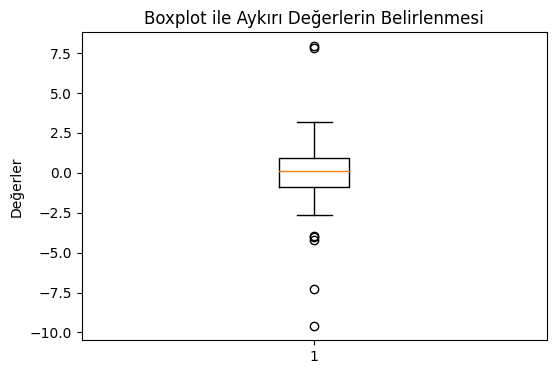

In [10]:
# Boxplot çizimi
plt.figure(figsize=(6, 4))
plt.boxplot(X)
plt.title('Boxplot ile Aykırı Değerlerin Belirlenmesi')
plt.ylabel('Değerler')
plt.show()

In [11]:
# Aykırı değerleri baskılama yöntemi ile güncelleyelim
median_X = np.median(X)
X_clipped = X.copy()  # Orijinal veri setini kopyalayalım
X_clipped[outliers_dbscan] = median_X  # Aykırı değerleri median ile değiştirelim
X_clipped

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788],
       [ 0.95008842],
       [-0.15135721],
       [-0.10321885],
       [ 0.4105985 ],
       [ 0.14404357],
       [ 1.45427351],
       [ 0.76103773],
       [ 0.12167502],
       [ 0.44386323],
       [ 0.33367433],
       [ 1.49407907],
       [-0.20515826],
       [ 0.3130677 ],
       [-0.85409574],
       [ 0.09409612],
       [ 0.6536186 ],
       [ 0.8644362 ],
       [-0.74216502],
       [ 2.26975462],
       [-1.45436567],
       [ 0.04575852],
       [-0.18718385],
       [ 1.53277921],
       [ 1.46935877],
       [ 0.15494743],
       [ 0.37816252],
       [-0.88778575],
       [-1.98079647],
       [-0.34791215],
       [ 0.15634897],
       [ 1.23029068],
       [ 1.20237985],
       [-0.38732682],
       [-0.30230275],
       [-1.04855297],
       [-1.42001794],
       [-1.70627019],
       [ 1.9507754 ],
       [-0.50965218],
       [-0

In [12]:
# İşlem yapıldıktan sonra veri setinin özelliklerini hesaplayalım
mean_after = np.mean(X_clipped)
std_after = np.std(X_clipped)
median_after = np.median(X_clipped)
variance_after = np.var(X_clipped)

print("Ortalama:", mean_after)
print("Standart Sapma:", std_after)
print("Medyan:", median_after)
print("Varyans:", variance_after)

Ortalama: 0.11043765237604287
Standart Sapma: 0.9979582987924877
Medyan: 0.09409611943799814
Varyans: 0.995920766128796
